<strong>Identifier:</strong> 631269

In [35]:
from tabulate import tabulate
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import sklearn.gaussian_process
import random as rd
import numpy as np
import scikitplot as skplt

# Part 1

### a)

In [11]:
df = pd.read_csv("Part 1.tsv",sep="\t")

### b)

In [12]:
df[['volatile acidity', 'pH', 'residual sugar']] = df['volatile acidity:pH:residual sugar'].str.split(':', 2, expand=True).astype(float)
df = df.dropna()
df = df[(df['volatile acidity']!='nan') & (df['pH']!='nan') & (df['residual sugar']!='nan')]
df = df.reset_index()
df = df[['alcohol','citric acid','volatile acidity', 'pH', 'residual sugar','quality']]
df

,alcohol,citric acid,volatile acidity,pH,residual sugar,quality
0,9.8,0.04,0.76,3.26,2.3,low
1,9.8,0.56,0.28,3.16,1.9,medium
2,10.0,0.00,0.65,3.39,1.2,high
3,10.5,0.36,0.50,3.35,6.1,low
4,9.3,0.28,0.56,3.11,1.7,low
...,...,...,...,...,...,...
3028,10.6,0.32,0.21,3.24,0.9,medium
3029,9.7,0.38,0.23,3.29,1.3,low
3030,9.4,0.19,0.24,2.99,1.2,medium
3031,12.8,0.30,0.29,3.34,1.1,high


### c)

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

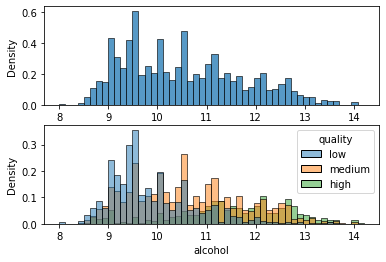

In [13]:
f, axes = plt.subplots(2,1)
sns.histplot(data=df, x="alcohol", stat='density', bins=50, ax=axes[0])
sns.histplot(data=df, x="alcohol", stat='density', bins=50, hue='quality', ax=axes[1])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

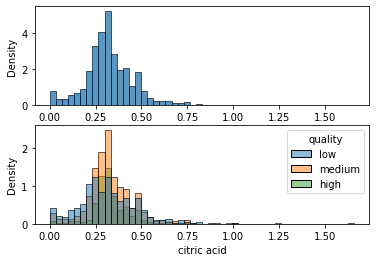

In [14]:
f, axes = plt.subplots(2,1)
sns.histplot(data=df, x="citric acid", stat='density', bins=50, ax=axes[0])
sns.histplot(data=df, x="citric acid", stat='density', bins=50, hue='quality', ax=axes[1])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

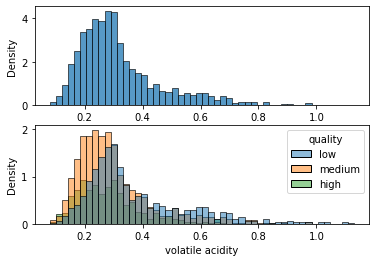

In [15]:
f, axes = plt.subplots(2,1)
sns.histplot(data=df, x="volatile acidity", stat='density', bins=50, ax=axes[0])
sns.histplot(data=df, x="volatile acidity", stat='density', bins=50, hue='quality', ax=axes[1])

<AxesSubplot:xlabel='pH', ylabel='Density'>

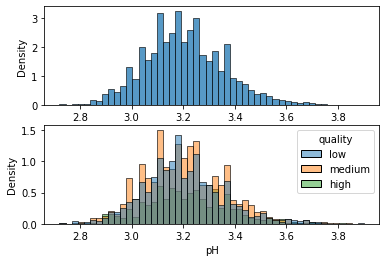

In [16]:
f, axes = plt.subplots(2,1)
sns.histplot(data=df, x="pH", stat='density', bins=50, ax=axes[0])
sns.histplot(data=df, x="pH", stat='density', bins=50, hue='quality', ax=axes[1])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

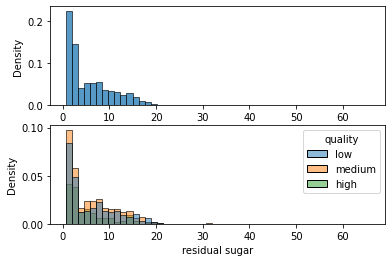

In [17]:
f, axes = plt.subplots(2,1)
sns.histplot(data=df, x="residual sugar", stat='density', bins=50, ax=axes[0])
sns.histplot(data=df, x="residual sugar", stat='density', bins=50, hue='quality', ax=axes[1])

### d)

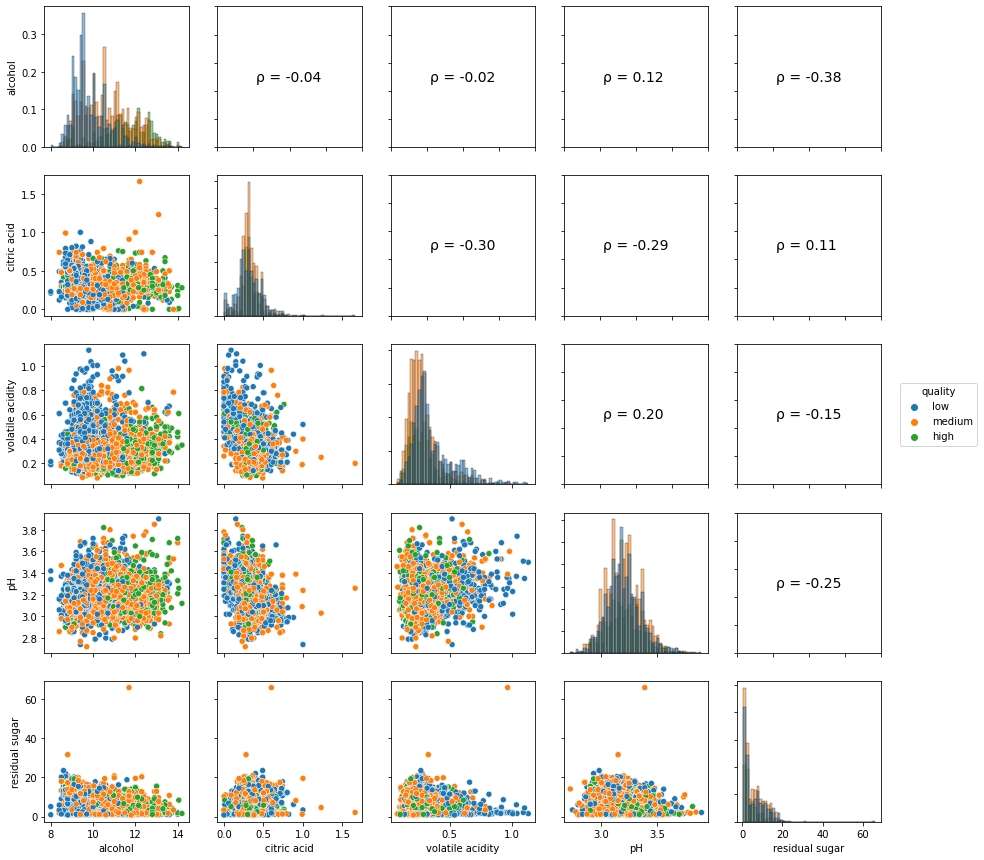

In [18]:
f, axes = plt.subplots(5,5,figsize=(15,15))
cors = df.corr(method='pearson')
for i in range(5):
    for j in range(5):
        if (i!=4): axes[i,j].set_xticklabels([])
        if (j!=0): axes[i,j].set_yticklabels([])
        if i>j:
            t = sns.scatterplot(x=df.iloc[:,j],y=df.iloc[:,i], ax=axes[i,j], hue=df['quality'], legend=False)
            if (i==2 and j==0):
                t = sns.scatterplot(x=df.iloc[:,j],y=df.iloc[:,i], ax=axes[i,j], hue=df['quality'])
                t.legend(loc='center right', bbox_to_anchor=(6.5, 0.5), ncol=1).set_title('quality')
            if (i<4): t.set(xlabel=None)
            if (j>0): t.set(ylabel=None)

        elif i==j:
            t = sns.histplot(x=df.iloc[:,i], stat='density', bins=50, hue=df['quality'], ax=axes[i,j], legend=False)
            t.set(ylabel=None, xlabel=None)
            if (i==0): t.set(ylabel='alcohol')
            if (i==4): t.set(xlabel='residual sugar')
        else:
            axes[i,j].text(0.27, 0.47,'\u03C1 = '+"{:.2f}".format(cors.iloc[i,j]), fontsize=14)

# Part 2

### a)

In [80]:
df = pd.read_csv("Part 2.tsv", sep='\t', index_col=0)
df

,x,y,label
0,26.344819,-3.374110,2.0
1,24.427369,6.122175,1.0
2,3.331194,14.686814,0.0
3,26.685254,3.978273,1.0
4,14.417311,-5.066747,1.0
...,...,...,...
3745,18.019854,-4.935174,1.0
3746,24.966280,-4.393177,2.0
3747,21.627001,10.034507,2.0
3748,8.994259,13.005430,0.0


### b)

<AxesSubplot:xlabel='x', ylabel='y'>

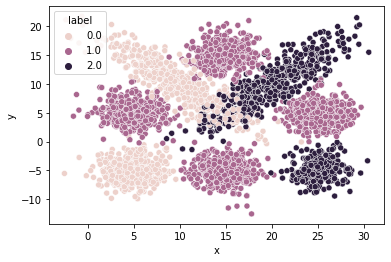

In [81]:
sns.scatterplot(data=df, x='x', y='y', hue='label')

### c)

In [82]:
from sklearn.mixture import BayesianGaussianMixture
from scipy.stats import multivariate_normal

# Preparing multivariate_normals infered with the points for each class
def config(df):
    data = [df[df['label']==i] for i in range(3)]
    components = [2,4,2]
    priori = [len(data[i])/len(df) for i in range(3)]
    models = [BayesianGaussianMixture(n_components=components[i], random_state=42).fit(data[i].iloc[:,:2]) for i in range(3)]
    means = [models[i].means_ for i in range(3)]
    covariances = [models[i].covariances_ for i in range(3)]
    normals = [[multivariate_normal(mean=means[i][j], cov=covariances[i][j]) for j in range(components[i])] for i in range(3)]
    return normals, components, priori
    
normals, components, priori = config(df)    

# Predict points classes given a list of points in the form [x,y]
def classify(l):
    t = [[sum([normals[i][j].pdf(p) for j in range(components[i])])*priori[i] for i in range(3)] for p in l]
    return [float(k.index(max(k))) for k in t]

classify([[5,-5],[8,10],[15,-5],[5,5],[15,15],[25,5],[25,-5],[22,10]])

[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0]

# Parte 3

Preparing and training implementations

In [83]:
from sklearn.naive_bayes import GaussianNB

train, test = sk.model_selection.train_test_split(df, test_size=0.25)
rd.seed(42)

nb = GaussianNB().fit(train.iloc[:,:2], train['label']) # Naive Bayes
kn = sk.neighbors.KNeighborsClassifier(n_neighbors=10).fit(train.iloc[:,:2], train['label']) # K nearest neighbors
def pr_predict(l): return rd.choices(population = [0.,1.,2.],
        weights = [len(train[train['label']==i])/len(train) for i in range(3)], k = len(l)) # Prioris
def pr_predict_proba(l): return [[len(train[train['label']==i])/len(train) for i in range(3)]]*len(l)
sg = sk.mixture.BayesianGaussianMixture(n_components=3, random_state=42).fit(train.iloc[:,:2], train['label']) # Single Gaussian
normals, components, priori = config(train)
def gm_predict(l): # Gaussian Mixture
    t = [[sum([normals[i][j].pdf(p) for j in range(components[i])])*priori[i] for i in range(3)] for p in l]
    return [float(k.index(max(k))) for k in t]
def gm_predict_proba(l):
    t = [[sum([normals[i][j].pdf(p) for j in range(components[i])])*priori[i] for i in range(3)] for p in l]
    return [list(p/sum(p)) for p in t]

Testing for some known points for check

In [84]:
print(nb.predict([[5,-5],[8,10],[15,-5],[5,5],[15,15],[25,5],[25,-5],[22,10]]))
print(kn.predict([[5,-5],[8,10],[15,-5],[5,5],[15,15],[25,5],[25,-5],[22,10]]))
print(pr_predict([[5,-5],[8,10],[15,-5],[5,5],[15,15],[25,5],[25,-5],[22,10]]))
print(sg.predict([[5,-5],[8,10],[15,-5],[5,5],[15,15],[25,5],[25,-5],[22,10]]))
print(gm_predict([[5,-5],[8,10],[15,-5],[5,5],[15,15],[25,5],[25,-5],[22,10]]))

print(nb.predict_proba([[5,-5],[8,10]]))
print(kn.predict_proba([[5,-5],[8,10]]))
print(pr_predict_proba([[5,-5],[8,10]]))
print(sg.predict_proba([[5,-5],[8,10]]))
print(gm_predict_proba([[5,-5],[8,10]]))

[0. 0. 1. 0. 1. 2. 2. 1.]
[0. 0. 1. 1. 1. 1. 2. 2.]
[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0]
[2 0 2 0 0 1 1 0]
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0]
[[7.37406170e-01 2.62431283e-01 1.62547835e-04]
 [5.17842385e-01 4.80078226e-01 2.07938851e-03]]
[[1. 0. 0.]
 [1. 0. 0.]]
[[0.2713371266002845, 0.5334281650071123, 0.19523470839260312], [0.2713371266002845, 0.5334281650071123, 0.19523470839260312]]
[[1.62266603e-02 1.24581369e-29 9.83773340e-01]
 [1.00000000e+00 7.52606285e-20 2.62544705e-17]]
[[0.9996944605273151, 3.844949765346662e-07, 0.0003051549777083875], [0.9712055058944188, 0.02879448971438944, 4.39119175628493e-09]]


Making predictions for the test set

In [85]:
tools = ['Naive Bayes', 'K-nearest-neighbour', 'Priors', 'Single Gaussian', 'Gaussian Mixture']
p = test.iloc[:,:2].values.tolist()
pred = [nb.predict(p), kn.predict(p), pr_predict(p), sg.predict(p), gm_predict(p)]
pred_probs = [nb.predict_proba(p).tolist(), kn.predict_proba(p).tolist(), pr_predict_proba(p), \
             sg.predict_proba(p).tolist(), gm_predict_proba(p)]

### a)

In [191]:
accuracy = [round(sk.metrics.accuracy_score(test['label'],pred[i]),5) for i in range(5)]
precision = [round(sk.metrics.precision_score(test['label'],pred[i], average='macro'),5) for i in range(5)]
recall = [round(sk.metrics.recall_score(test['label'],pred[i], average='macro'),5) for i in range(5)]
auc_roc = [round(sk.metrics.roc_auc_score(test['label'],pred_probs[i], multi_class='ovo'),5) for i in range(5)]
t = [sk.metrics.roc_curve(test['label'],pred[i],pos_label=2) for i in range(5)]
auc_pr = [round(sk.metrics.auc(l[0], l[1]),5) for l in t]
l = [tools,accuracy,precision,recall,auc_roc,auc_pr]
metric = ['Metric','Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'AUC-PR']

# print(tabulate([[metric[i]]+l[i] for i in range(6)],headers='firstrow',tablefmt='fancy_grid'))
print(tabulate([metric] + [[l[k][i] for k in range(6)] for i in range(5)],headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╤═════════════╤══════════╤═══════════╤══════════╕
│ Metric              │   Accuracy │   Precision │   Recall │   AUC-ROC │   AUC-PR │
╞═════════════════════╪════════════╪═════════════╪══════════╪═══════════╪══════════╡
│ Naive Bayes         │    0.5629  │     0.54469 │  0.55986 │   0.8202  │  0.75802 │
├─────────────────────┼────────────┼─────────────┼──────────┼───────────┼──────────┤
│ K-nearest-neighbour │    0.95736 │     0.94645 │  0.93966 │   0.99433 │  0.90399 │
├─────────────────────┼────────────┼─────────────┼──────────┼───────────┼──────────┤
│ Priors              │    0.38486 │     0.32849 │  0.32795 │   0.5     │  0.52316 │
├─────────────────────┼────────────┼─────────────┼──────────┼───────────┼──────────┤
│ Single Gaussian     │    0.25267 │     0.28447 │  0.24952 │   0.50981 │  0.39685 │
├─────────────────────┼────────────┼─────────────┼──────────┼───────────┼──────────┤
│ Gaussian Mixture    │    0.96482 │     0.95908 │  0.94951 │   0

In [397]:
# from itertools import cycle
# n_classes=5

# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))
# [skplt.metrics.plot_roc_curve(test['label'],pred_probs[i]) for i in range(5)]
# f, axes = plt.subplots(2,1,figsize=(15,15))
# for cl in range(1):
#     df = test[test['label']==cl]
#     p = df.iloc[:,:2].values.tolist()
#     pred = [nb.predict(p), kn.predict(p), pr_predict(p), sg.predict(p), gm_predict(p)]
#     t = [sk.metrics.roc_curve(df['label'],pred[i],pos_label=2) for i in range(5)]

# for i in range(5):
# #     fpr, tpr, _ = t[0]
#     plt.plot(t[i][0],t[i][1],label=tools[i])
# plt.legend(loc=4)
# plt.show()
# for k in range(len(test)):

# tmp = [[(test['label'].tolist()[k], pred[i][k]) for k in range(len(test))] for i in range(5)]
# lst = [[[[x for (x,y) in tmp[k] if x==cl],[y for (x,y) in tmp[k] if x==cl]] for cl in range(3)] for k in range(5)]


# for cl in range(3):
#     t = [sk.metrics.roc_curve(lst[i][cl][0],lst[i][cl][1],pos_label=cl) for i in range(5)]
#     for i in range(5):
#         plt.plot(t[i][0],t[i][1],label=tools[i])
#     plt.legend(loc=4)
#     plt.show()
# sk.metrics.roc_auc_score(lst[0][0], lst[0][1], multi_class='ovo')
# fpr, tpr, _ = sk.metrics.roc_curve(lst[0][0], lst[0][1])

# t = [sk.metrics.roc_curve(lst[i][0][0],lst[i][0][1]) for i in range(5)]
# t

# sk.metrics.roc_curve(lst[0][0],lst[0][1])
# for cl in range(3):
#     t = [sk.metrics.roc_curve(lst[cl][0],lst[cl][1],pos_label=cl) for i in range(5)]
#     for i in range(5):
#         plt.plot(t[i][0],t[i][1],label=cl)
#     plt.legend(loc=4)
#     plt.show()


# for cl in range(3):
#     for tl in range(5):
#         t = test.copy()
#         t['pr']=pred[tl]
#         t = t[t['label']==cl]
#         fpr, tpr, _ = sk.metrics.roc_curve(t['label'],t['pr'],pos_label=cl)
#         plt.plot(fpr,tpr,label=tools[tl])
#         plt.legend(loc=4)
#     plt.show()

# t = test.copy()
# t['pr']=pred[tl]
# t = t[t['label']==cl]
# fpr, tpr, _ = sk.metrics.roc_curve(t['label'],t['pr'],pos_label=cl)
# plt.plot(fpr,tpr,label=tools[tl])
# plt.legend(loc=4)
# plt.show()